In [1]:
import pandas as pd
import numpy as np
import itertools 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#import umap

In [10]:
def read_data(train_in_csv, train_out_csv, test_int_csv, test_out_csv):
    """Reads data from CSV files and returns it as numpy arrays.
    """
    train_in = pd.read_csv("train_in.csv")
    train_out = pd.read_csv("train_out.csv")
    train_in = np.array(train_in)
    train_out = np.array(train_out)
    train_out = np.squeeze(train_out)

    test_in = pd.read_csv("test_in.csv")
    test_out = pd.read_csv("test_out.csv")
    test_in = np.array(test_in)
    test_out = np.array(test_out)
    test_out = np.squeeze(test_out, axis=1)
    
    return train_in, train_out, test_in, test_out

In [11]:
def get_points(train_in, train_out):
    """Method do represent digits 0-9 as a point in 256-dimensional space.
    
    This method considers 16x16 pixel images as points in 256 dimensional space,
    where each dimension is the brightness of a specific pixel. The method then 
    averages all point of a given digit to obtain an average point for each digit
    (0-9). It then computes the distances in these space between all average points.
    
    Arguments:
        train_in (array): An array of 16x16 images, represented by pixel brightness
        train_out (array): An array of labels indicating which digit (0-9) is represented
                           by the same indexed data point in train_in
    
    Returns:
        means (dict): A dictionary with points in 256-dimensional
                      space representing all digits 0-9
    """
    clouds = dict()

    for x in range(10):
        clouds[x] = train_in[np.where(train_out == x)[0],:]


    means = dict()
    for x in range(10):
        means[x] =  np.mean(clouds[x], axis=0)

    return means

def get_distances(means):
    """Method to get a distance matrix from a given set of 10 points.
    
    Arguments:
        means (dict): The set of points to obtain a distance matrix from
        
    Returns:
        distances (array): A 10x10 array with all distances between each point in means
    """
    distances = []
    for i in range(10):
        for j in range(10):
            distances.append(np.linalg.norm(means[i]-means[j]))
            
    distances = np.array(distances)
    distances = np.reshape(distances,(10,10))
    
    return distances

In [12]:
def plot_pca(train_in, train_out): 
    """Plots pixel brightness data using the PCA dimensionality reduction algorithm.
    
    Arguments:
        train_in (array): An array of 16x16 images, represented by pixel brightness
        train_out (array): An array of labels indicating which digit (0-9) is represented
                           by the same indexed data point in train_in
    """
    pca = PCA(n_components=2)
    PCs = pca.fit_transform(train_in)

    plt.figure(figsize=(10,10)) 

    for i in range(10):
        ind = train_out == i
        plt.scatter(PCs[ind, 0], PCs[ind, 1], label=i, s=25, alpha=1)

    plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=20)
    plt.title("PCA")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    
def plot_umap(train_in, train_out):
    """Plots pixel brightness data using the UMAP dimensionality reduction algorithm.
    
    Arguments:
        train_in (array): An array of 16x16 images, represented by pixel brightness
        train_out (array): An array of labels indicating which digit (0-9) is represented
                           by the same indexed data point in train_in
    """
    umap = umap.UMAP()
    X_u = umap.fit_transform(train_in)

    plt.figure(figsize=(10,10))

    for i in range(10):
        ind = train_out == i
        plt.scatter(X_u[ind, 0], X_u[ind, 1], label=i, s=25, alpha=1)
        
    plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=20)
    plt.title("UMAP")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    
def plot_tsne(train_in, train_out):
    """Plots pixel brightness data using the t-SNE dimensionality reduction algorithm.
    
    Arguments:
        train_in (array): An array of 16x16 images, represented by pixel brightness
        train_out (array): An array of labels indicating which digit (0-9) is represented
                           by the same indexed data point in train_in
    """
    t_sne = TSNE(n_components=2)
    X_tsne = t_sne.fit_transform(train_in)

    plt.figure(figsize=(10,10))

    for i in range(10):
        ind = train_out == i
        plt.scatter(X_tsne[ind, 0], X_tsne[ind, 1], label=i, s=25, alpha=1)
        
    plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', fontsize=20)
    plt.title("t-SNE")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")

In [13]:
def identify(_in, _out, means):
    """Given a set of points, identify each point by its closest neighbor.
    
    We have a dictionary of points representing each digit 0-9. Then, given
    a set of pixel data, we identify each data point as being the digit to
    which' mean it is closest. We compare this to the actual digit (label).
    
    Arguments:
        _in (array): An array of 16x16 images, represented by pixel brightness
        _out (array): An array of labels indicating which digit (0-9) is represented
                           by the same indexed data point in _in
    
    Returns:
        classes (array): Array of predicted digit values
    """
    classes = []
    for i in _in:
        distances = []
        for j in range(10):
            mean = means[j]
            dis = np.linalg.norm(mean-i)
            distances.append(dis)
        dis_min = np.amin(distances)
        _class = float(np.where(distances==dis_min)[0])
        classes.append(_class)

    classes = np.array(classes)
    
    return classes

In [14]:
def knn_predict(train_in, train_out, _in, n_neighbors):
    """Trains KNN identification using sk-learn module.
    
    Arguments:
        train_in (array): An array of 16x16 images, represented by pixel brightness
        train_out (array): An array of labels indicating which digit (0-9) is represented
                           by the same indexed data point in train_in
        _in (array): An array of 16x16 images, represented by pixel brightness
        n_neighbors (int): The amount (k) of neighbors used in the KNN classification
        
    Returns:
        knn_out (array): A prediction obtained by KNN classification
    """
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_in, train_out)
    knn_out = knn.predict(_in)
    
    return knn_out

def accuracy(prediction, labels):
    """Gives the accuracy of a given prediction.
    
    Arguments:
        prediction (array): Array of predicted digit values
        labels (array): Array of actual digit values
    Returns:
        succes_rate (float): A number between 0-1 representing the fraction of digits
                              that were identified correctly
    """
    diff = prediction - labels
    success_rate = len(np.where(diff == 0)[0])/len(labels)

    return success_rate

In [19]:
def task1(train_in, train_out, test_in, test_out):
    """Runs everything from the first task
    """
    points = get_points(train_in, train_out)
    distance_matrix = get_distances(points)
    
    train_predictions_points = identify(train_in, train_out, points)
    test_predictions_points = identify(test_in, test_out, points)
    train_predictions_knn = knn_predict(train_in, train_out, train_in, 12)
    test_predictions_knn = knn_predict(train_in, train_out, test_in, 12)
    
    conf_m_knn = confusion_matrix(test_out, test_predictions_knn)
    conf_m_knn_train = confusion_matrix(train_out, train_predictions_knn)

    conf_m_simp = confusion_matrix(test_out, test_predictions_points)
    conf_m_simp_train = confusion_matrix(train_out, train_predictions_points)
    
    plot_pca(train_in, train_out)
    plot_tsne(train_in, train_out)
    
    print("The distance between each point in 256-dimensional space:")
    print(distance_matrix)
    
    print("The succes rate using points clouds;\n on the training set:")
    print(accuracy(train_predictions_points,train_out))
    
    print(";on the test set:")
    print(accuracy(test_predictions_points,test_out))
    
    print("The succes rate using KNN classification;\n on the training set:")
    print(accuracy(train_predictions_knn,train_out))
    
    print("; on the test set:")
    print(accuracy(test_predictions_knn,test_out))
    
    print("Confusion matrix of point cloud method;\n on the training set:")
    print(conf_m_simp_train)
    
    print("; on the test set:")
    print(conf_m_simp)
    
    print("Confusion matrix of KNN classification;\n on the training set:")
    print(conf_m_knn_train)
    
    print("; on the test set:")
    print(conf_m_knn)

In [20]:
class Digit_perceptron:
    """The perceptron class is a module that contains all functions needed to define 
    a perceptron network capable of training its weights on a labeled set of training data and
    of giving predictions for digits given a set of unlabeled testing data.
    """
    def __init__(self, digit_matrix, weight=np.random.uniform(size=(256, 10)), bias=np.random.uniform(size=(10)), learning_rate=0.01, n_iters=100):
        """Constructor of the Digit Perceptron class.
        
        Arguments:
            digit_matrix (array): A matrix containing the digits to identify
            weight (array): An array of initial weights
            bias (array): An array of inital biases
            learning_rate (float): The learning rate defines the speed by which the weights
                                   and biases are updated
            n_iters (int): The amount of times the network cycles through the entire data set
        """
        self.lr = learning_rate
        self.n_iter = n_iters
        self.activation = self._none
        
        self.weights = weight
        self.bias = bias
        self.digit = digit_matrix
        
    def fit(self, x, y):
        """A function to update the networks weights and biases to a given set of data.
        
        Iterates through the data n_iter times, updating the weights using the update
        rule at every step.
        
        Arguments:
            x (array): An array of 16x16 pixel images, represented as numbers
            y (array): The digit label (0-9) of each image in x
        """
        y_m = np.repeat([y], [10], axis=0)
        y_ = np.ones(shape=y_m.shape)*(y_m==self.digit)
        
        for _ in range(self.n_iter):
            for i, x_i in enumerate(x):
                prediction = self.predict(x_i)
                update = self.lr*(y_[:,i]-self._u_step(prediction))

                self.weights += update * np.transpose(np.repeat(x_i[None,...], [10], axis=0))
                self.bias += update
                
    def predict(self, x):
        """Predicts the label(s) of a given data set.
        
        Arguments:
             x (array): An array of 16x16 pixel images, represented as numbers
             
        Returns: 
            y_predicted (array): The predicted digit label(s) for x
        """
        linear_output = np.dot(x, self.weights)+self.bias
        y_predicted = self.activation(linear_output)
        return y_predicted
    
    
    def _val_func(self, x):
        """The ReLU activation function; y=max(0,x)
        """
        return np.where(x>=0,x,0)
    
    def _u_step(self, x):
        """The unit step function
        """
        return np.where(x>0,1,0)
    
    def _none(self, x):
        return x

In [21]:
def task2(train_in,train_out,test_in,test_out):
    """Runs everything from the second task
    """
    d_x = np.arange(0,1706,1)
    d_y = np.arange(0,10,1)
    digit_mesh = np.meshgrid(d_x, d_y)[1]
    
    p = Digit_perceptron(digit_matrix=digit_mesh)
    p.fit(train_in, train_out)
    predictions = p.predict(test_in)
    predictions = np.argmax(np.squeeze(predictions), axis=1)
    
    succes_rate_perceptron = accuracy(prediction, test_out)
    
    print("The prediction accuracy of the perceptron network is:")
    print(succes_rate_perceptron)

In [16]:
def main():
    train_in, train_out, test_in, test_out = read_data("train_in.csv","train_out,csv","test_in.csv","test_out.csv")
    task1(train_in,train_out,test_in,test_out)
    task2(train_in,train_out,test_in,test_out)

C:\Users\elvis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\elvis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


The distance between each points in 256-dimensional space:
[[ 0.         14.44960797  9.33455587  9.14373367 10.76984444  7.51929626
   8.16301949 11.86455505  9.90790174 11.48887494]
 [14.44960797  0.         10.12532258 11.7332329  10.17378643 11.11880041
  10.59793273 10.74315367 10.08677677  9.9320937 ]
 [ 9.33455587 10.12532258  0.          8.17828489  7.93254148  7.90679632
   7.31795234  8.87253107  7.07751618  8.88774785]
 [ 9.14373367 11.7332329   8.17828489  0.          9.0876078   6.11875002
   9.29242591  8.92240093  7.02042489  8.35435012]
 [10.76984444 10.17378643  7.93254148  9.0876078   0.          8.00151741
   8.76599667  7.58301228  7.38090899  6.01040793]
 [ 7.51929626 11.11880041  7.90679632  6.11875002  8.00151741  0.
   6.68862915  9.21195402  6.96738648  8.25853807]
 [ 8.16301949 10.59793273  7.31795234  9.29242591  8.76599667  6.68862915
   0.         10.8681573   8.57020763 10.41974352]
 [11.86455505 10.74315367  8.87253107  8.92240093  7.58301228  9.21195402


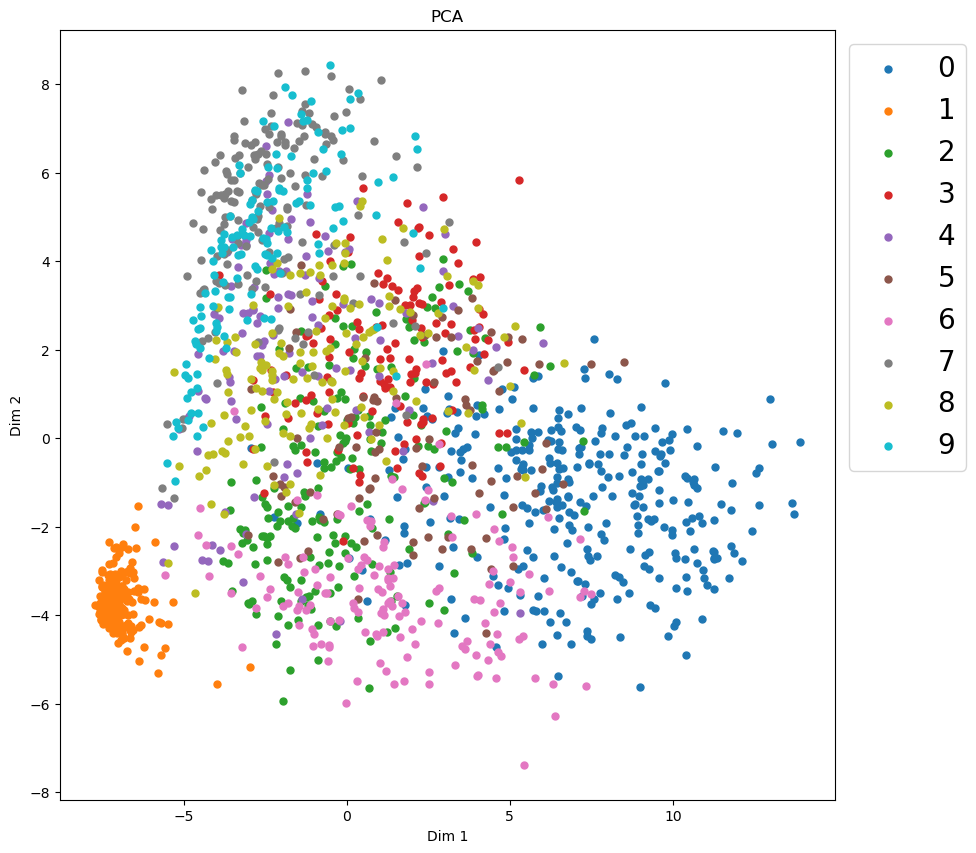

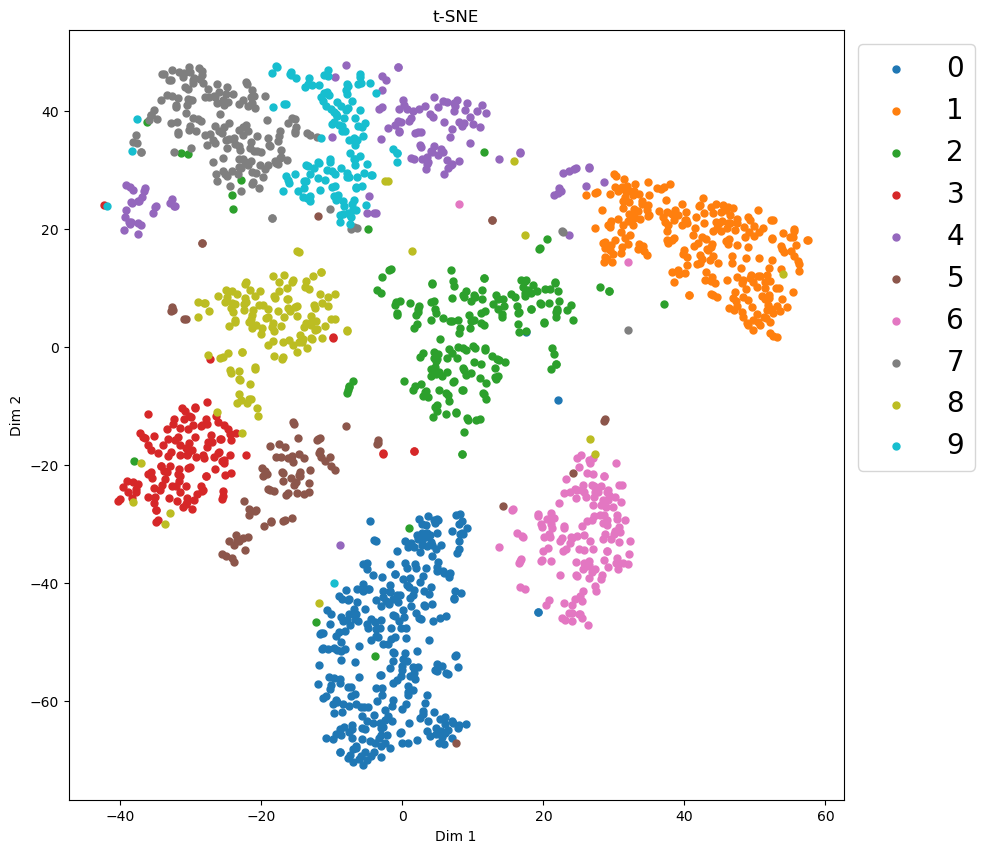

In [17]:
main()